In [1]:
!pip install datasets pandas matplotlib seaborn ipython

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
titles = []
prices = []

# Crawl first 5 pages
for i in range(1, 6):
    url = f"http://books.toscrape.com/catalogue/page-{i}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text.replace("£", "")
        titles.append(title)
        raw_price = book.find("p", class_="price_color").text
        price = re.findall(r"[\d.]+", raw_price)[0]  
        prices.append(float(price))

In [17]:
# Save to DataFrame
df = pd.DataFrame({
    "Title": titles,
    "Price": prices
})

In [20]:
# Save to CSV
df.to_csv("~/Downloads/S2-OutilsTraitementCorpus/OutilsTraitementCorpus/data/book_data.csv", index=False)

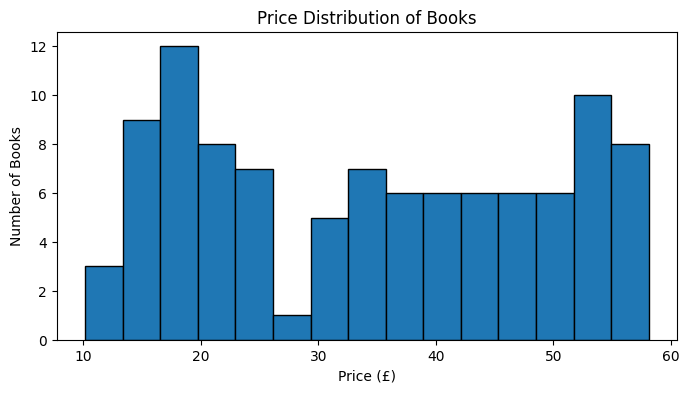

In [24]:
# Plot price distribution
plt.figure(figsize=(8, 4))
plt.hist(df["Price"], bins=15, edgecolor='black')
plt.title("Price Distribution of Books")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
save_path = os.path.expanduser("~/Downloads/S2-OutilsTraitementCorpus/OutilsTraitementCorpus/figures/distribution.png")
plt.savefig(save_path)
plt.show()